# import libraries 

In [2]:
!pip3 install tensorflow

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding, Dropout
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SimpleRNN, LSTM, GRU, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [4]:
# initialize file names
f1 = 'dataset1.csv' # 
f2 = 'dataset2.csv' #
f3 = 'dataset3.csv' #

# initialize dataframes: all empty
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

files_list = [f1, f2, f3]

# funcation to load in df

In [10]:
# initialize dataframes: all empty
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

files_list = [f1, f2, f3]

def load_df(fname, df, name):
  file_path = 'dataset-csv-files/' + fname

  # Read the CSV file
  new_data = pd.read_csv(file_path)

  # If df is still empty, you can directly assign new_data to df
  if df.empty:
    df = new_data
  else:
    # Concatenate the new data with the existing DataFrame
    df = pd.concat([df, new_data], ignore_index=True)

  print(name + ' has loaded in.')
  #print(df.shape)
  #print(df.head())
  #print('\n')
  return df

df1 = load_df(f1, df1, 'df1')
df2 = load_df(f2, df2, 'df2')
df3 = load_df(f3, df3, 'df3')

df_list = [df1, df2, df3]

df1 has loaded in.
df2 has loaded in.
df3 has loaded in.


# map df values for datasets

In [12]:
# Dataset 1
df1_texts = df1['review_text'].values
df1_labels = df1['class_index'].map({1: 0, 2: 1}).values

# Dataset 2
df2_texts = df2['text'].values
df2_labels = df2['label'].map({'__label__2': 1, '__label__1': 0}).values.astype(int)

# Dataset 3
df3_texts = df3['reviewText'].astype(str).values # Your text data
df3_labels = df3['rating']

# Vanilla rnn

In [6]:
def VanillaRNN(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    x_temp, x_test, y_temp, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

    RNN_model = Sequential(name="Simple_RNN")
    RNN_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    RNN_model.add(SimpleRNN(128))
    RNN_model.add(Dropout(0.2))  # Adding Dropout layer
    RNN_model.add(Dense(1, activation='sigmoid'))

    RNN_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    history = RNN_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1, validation_data=(x_valid.astype(int), y_valid.astype(int)))

    score = RNN_model.evaluate(x_test.astype(int), y_test.astype(int), verbose=0)
    print(f"\n{name} Vanilla RNN Score---> {score}")
    print()

    print(f'Visualize data for: {name}')

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Dropout Vanilla RNN Model accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Dropout Vanilla RNN Model loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# model training 

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5101 - loss: 0.7064 - val_accuracy: 0.5010 - val_loss: 0.6922
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5196 - loss: 0.7009 - val_accuracy: 0.5750 - val_loss: 0.6730
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7136 - loss: 0.6005 - val_accuracy: 0.5945 - val_loss: 0.6815
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8712 - loss: 0.3445 - val_accuracy: 0.6550 - val_loss: 0.6905
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9704 - loss: 0.1147 - val_accuracy: 0.6805 - val_loss: 0.8057
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9918 - loss: 0.0433 - val_accuracy: 0.6970 - val_loss: 0.8223
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9996 - loss: 0.0114 - val_accuracy: 0.6970 - val_loss: 0.9214
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9995 - loss: 0.0047 - val_accuracy: 0.7020 - v

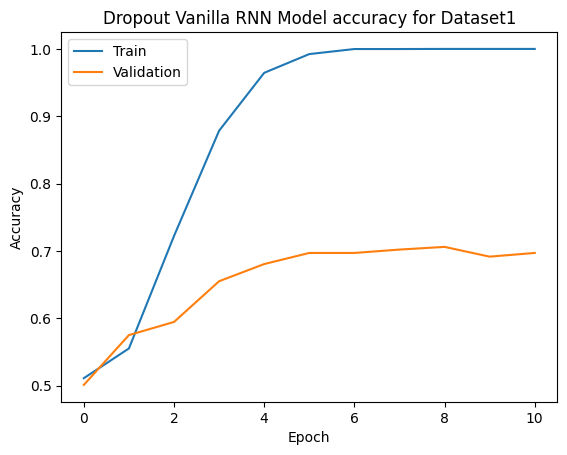

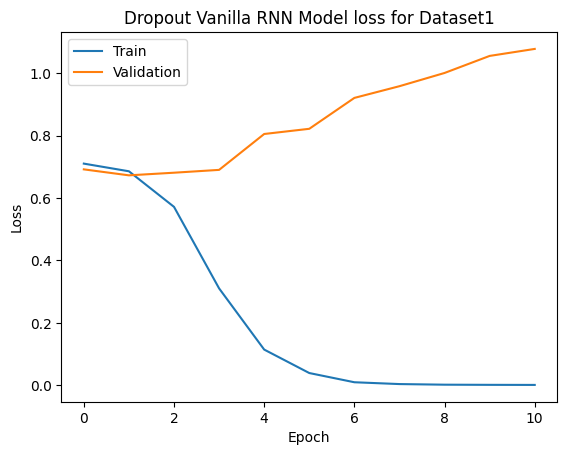

In [44]:
VanillaRNN(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.4991 - loss: 0.7020 - val_accuracy: 0.5005 - val_loss: 0.6945
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5112 - loss: 0.7148 - val_accuracy: 0.5090 - val_loss: 0.7017
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5518 - loss: 0.6946 - val_accuracy: 0.5915 - val_loss: 0.6675
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.6378 - loss: 0.6355 - val_accuracy: 0.5795 - val_loss: 0.6674
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6888 - loss: 0.6006 - val_accuracy: 0.5915 - val_loss: 0.6702
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.7335 - loss: 0.5373 - val_accuracy: 0.6010 - val_loss: 0.7047
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7448 - loss: 0.5031 - val_accuracy: 0.6380 - val_loss: 0.6795
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8073 - loss: 0.4151 - val_accuracy: 0.6470 - v

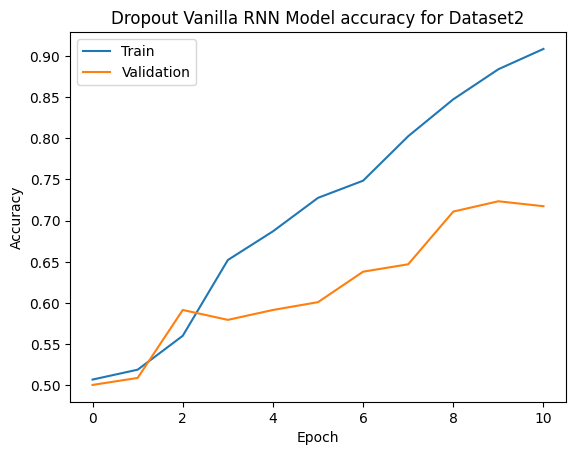

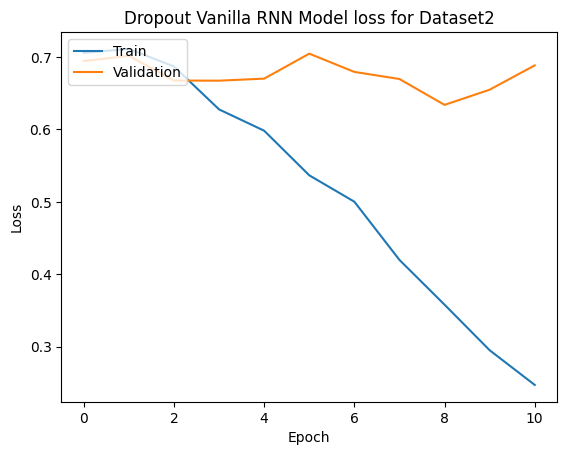

In [16]:
VanillaRNN(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 72s 633ms/step - accuracy: 0.5207 - loss: 0.6967 - val_accuracy: 0.4929 - val_loss: 0.7325
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 61s 537ms/step - accuracy: 0.5276 - loss: 0.7038 - val_accuracy: 0.5704 - val_loss: 0.6718
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 553ms/step - accuracy: 0.5731 - loss: 0.6802 - val_accuracy: 0.6046 - val_loss: 0.6594
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 59s 526ms/step - accuracy: 0.6360 - loss: 0.6406 - val_accuracy: 0.6125 - val_loss: 0.6486
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 60s 529ms/step - accuracy: 0.6956 - loss: 0.5799 - val_accuracy: 0.6417 - val_loss: 0.6434
Epoch 6/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 60s 534ms/step - accuracy: 0.7611 - loss: 0.4880 - val_accuracy: 0.7142 - val_loss: 0.5781
Epoch 7/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 60s 531ms/step - accuracy: 0.8311 - loss: 0.4004 - val_accuracy: 0.6762 - val_loss: 0.7264
Epoch 8/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 59s 522ms/step - accuracy: 0.8194 - loss: 0

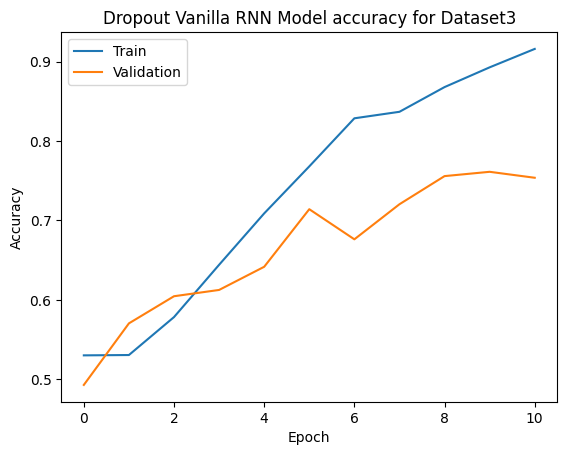

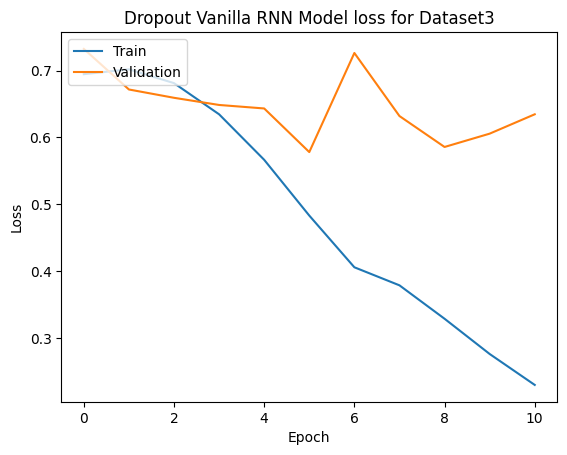

In [17]:
VanillaRNN(df3_texts, df3_labels, 'Dataset3')

# GRU

In [7]:
def GRU_Model(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    x_train, x_test, y_train, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    gru_model = Sequential(name=f"GRU_{name}")
    gru_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    #gru_model.add(GRU(128, activation='tanh', return_sequences=False))
    gru_model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    gru_model.add(Dense(1, activation='sigmoid'))

    gru_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    history = gru_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=1, validation_data=(x_valid, y_valid))

    score = gru_model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} GRU Model Score---> {score}")

    # Plot training & validation accuracy values
    plt.xlim(1, 10)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Dropout GRU Model Accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.xlim(1, 10)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Dropout GRU Model Loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.5467 - loss: 1.2278 - val_accuracy: 0.6995 - val_loss: 0.6264
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.7402 - loss: 3534785280.0000 - val_accuracy: 0.6600 - val_loss: 0.6366
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - accuracy: 0.7182 - loss: 0.5928 - val_accuracy: 0.6700 - val_loss: 0.6207
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.7697 - loss: 0.5451 - val_accuracy: 0.6750 - val_loss: 0.6105
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.7927 - loss: 1016642816.0000 - val_accuracy: 0.6585 - val_loss: 0.6195
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - accuracy: 0.7871 - loss: 0.5216 - val_accuracy: 0.6640 - val_loss: 0.6156
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.8110 - loss: 0.4924 - val_accuracy: 0.6650 - val_loss: 0.6138
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.8203 - loss:

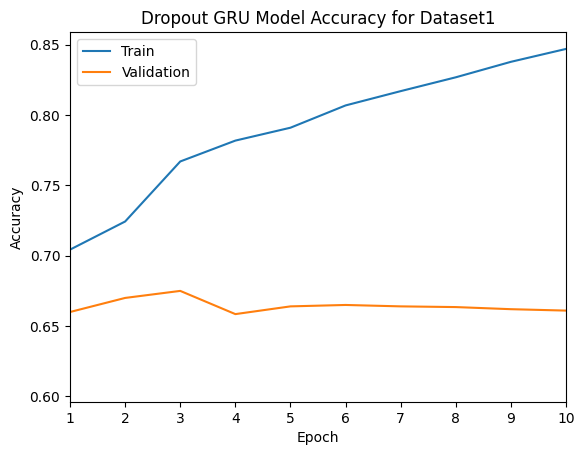

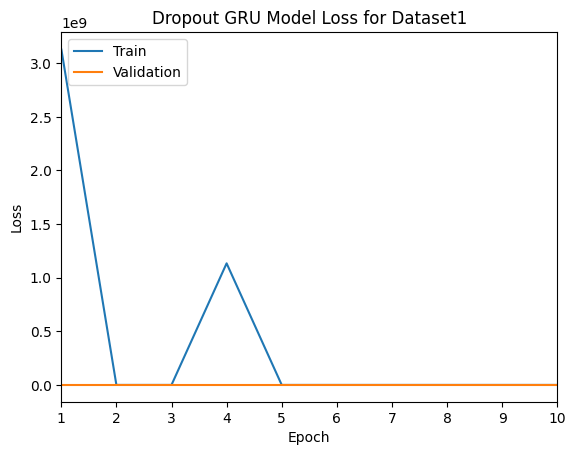

In [48]:
GRU_Model(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - accuracy: 0.5157 - loss: 1.1642 - val_accuracy: 0.5760 - val_loss: 0.6458
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.6282 - loss: 0.7943 - val_accuracy: 0.5130 - val_loss: 0.8097
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - accuracy: 0.5809 - loss: 0.6487 - val_accuracy: 0.5635 - val_loss: 0.7060
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.6796 - loss: 0.5619 - val_accuracy: 0.6065 - val_loss: 0.6797
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.7241 - loss: 0.5297 - val_accuracy: 0.6220 - val_loss: 0.7007
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.7729 - loss: 0.4993 - val_accuracy: 0.6385 - val_loss: 0.7042
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.7812 - loss: 0.4879 - val_accuracy: 0.6465 - val_loss: 0.7222
Epoch 8/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.8048 - loss: 0.4623 - val_accu

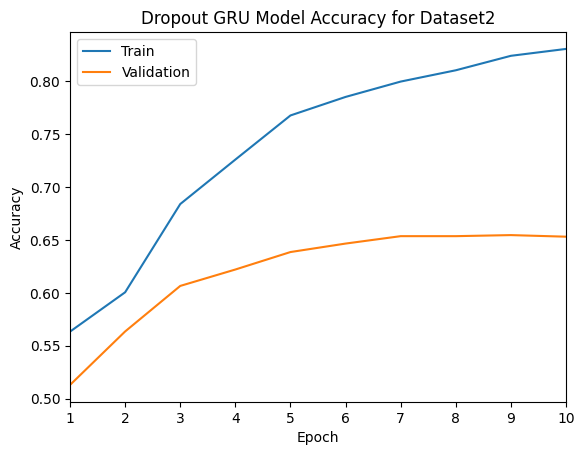

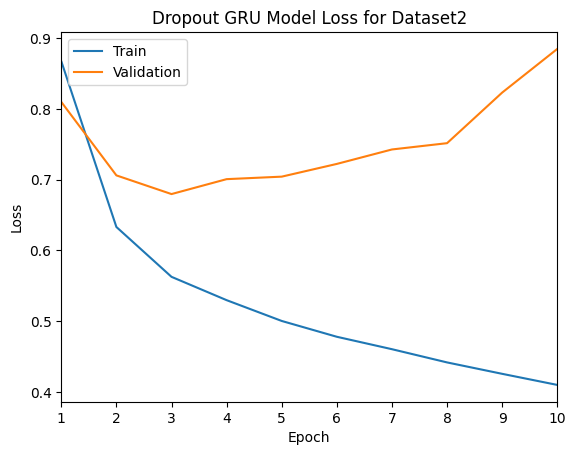

In [40]:
GRU_Model(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5190 - loss: nan - val_accuracy: 0.5071 - val_loss: nan
Epoch 2/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.5001 - loss: nan - val_accuracy: 0.5071 - val_loss: nan
Epoch 3/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.4957 - loss: nan - val_accuracy: 0.5071 - val_loss: nan
Epoch 4/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4872 - loss: nan - val_accuracy: 0.5071 - val_loss: nan
Epoch 5/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4991 - loss: nan - val_accuracy: 0.5071 - val_loss: nan
Epoch 6/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.4937 - loss: nan - val_accuracy: 0.5071 - val_loss: nan
Epoch 7/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.4923 - loss: nan - val_accuracy: 0.5071 - val_loss: nan
Epoch 8/11
113/113 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.4970 - loss: nan - val_accuracy: 0.5071 - val_loss: nan
Epoch 9/11
113/1

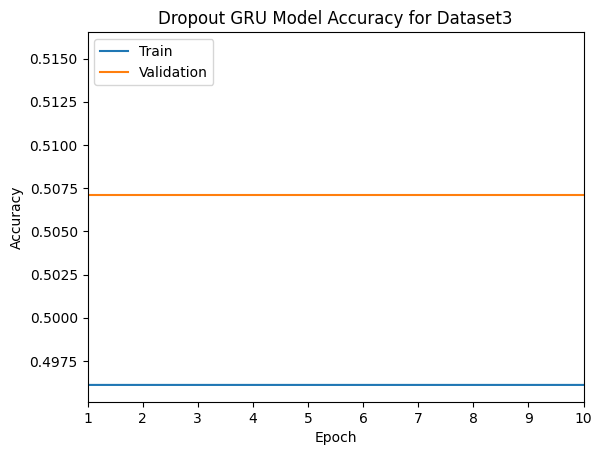

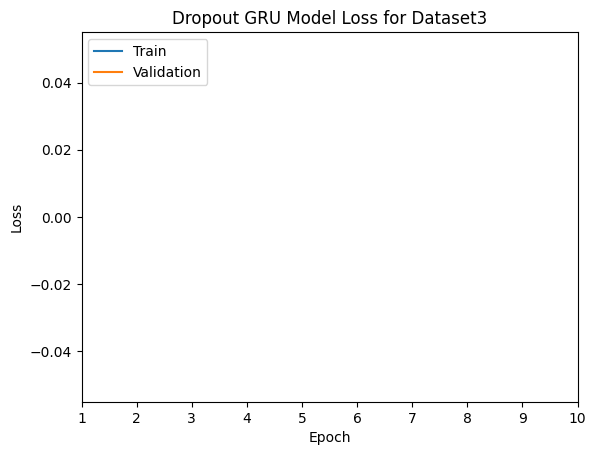

In [15]:
GRU_Model(df3_texts, df3_labels, 'Dataset3')

# LSTM

In [8]:
def LSTM_Model(df_texts, df_labels, name):
    vocab_size = 5000
    embd_len = 32

    # Tokenization and sequence padding
    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(df_texts)
    sequences = tokenizer.texts_to_sequences(df_texts)

    max_words = max(len(sequence) for sequence in sequences)
    x_data = pad_sequences(sequences, maxlen=max_words)

    # Splitting the dataset into train, validation, and test sets
    x_train, x_test, y_train, y_test = train_test_split(x_data, df_labels, test_size=0.2, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

    # Defining the LSTM model
    lstm_model = Sequential(name=f"LSTM_{name}")
    lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embd_len, input_length=max_words))
    lstm_model.add(LSTM(128, activation='tanh', return_sequences=False))
    lstm_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    lstm_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    # Training the model
    history = lstm_model.fit(x_train, y_train, batch_size=64, epochs=11, verbose=2, validation_data=(x_valid, y_valid))

    # Evaluating the model
    score = lstm_model.evaluate(x_test, y_test, verbose=0)
    print(f"\n{name} LSTM Model Score---> {score}")

    # Visualization of training and validation metrics
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Dropout LSTM Model Accuracy for {name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Dropout LSTM Model Loss for {name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# testing models

Epoch 1/11
94/94 - 18s - 190ms/step - accuracy: 0.6522 - loss: 0.6107 - val_accuracy: 0.7775 - val_loss: 0.4807
Epoch 2/11
94/94 - 16s - 170ms/step - accuracy: 0.8468 - loss: 0.3632 - val_accuracy: 0.8125 - val_loss: 0.4300
Epoch 3/11
94/94 - 17s - 177ms/step - accuracy: 0.9068 - loss: 0.2458 - val_accuracy: 0.8020 - val_loss: 0.4646
Epoch 4/11
94/94 - 17s - 176ms/step - accuracy: 0.9332 - loss: 0.1889 - val_accuracy: 0.8040 - val_loss: 0.4993
Epoch 5/11
94/94 - 18s - 189ms/step - accuracy: 0.9480 - loss: 0.1502 - val_accuracy: 0.7995 - val_loss: 0.5626
Epoch 6/11
94/94 - 18s - 193ms/step - accuracy: 0.9660 - loss: 0.1036 - val_accuracy: 0.7940 - val_loss: 0.6626
Epoch 7/11
94/94 - 18s - 191ms/step - accuracy: 0.9735 - loss: 0.0911 - val_accuracy: 0.7720 - val_loss: 0.6557
Epoch 8/11
94/94 - 18s - 194ms/step - accuracy: 0.9753 - loss: 0.0748 - val_accuracy: 0.7880 - val_loss: 0.7715
Epoch 9/11
94/94 - 18s - 196ms/step - accuracy: 0.9802 - loss: 0.0634 - val_accuracy: 0.7940 - val_loss:

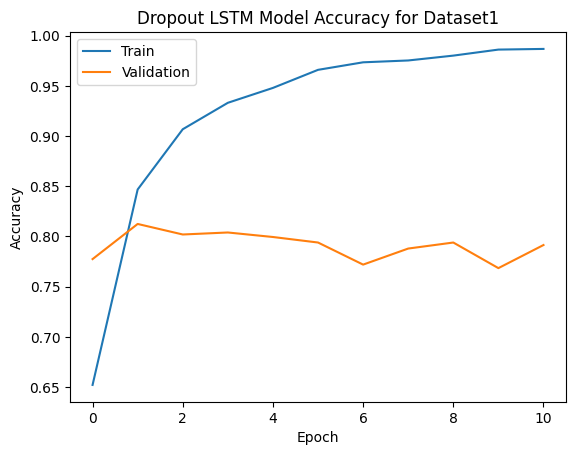

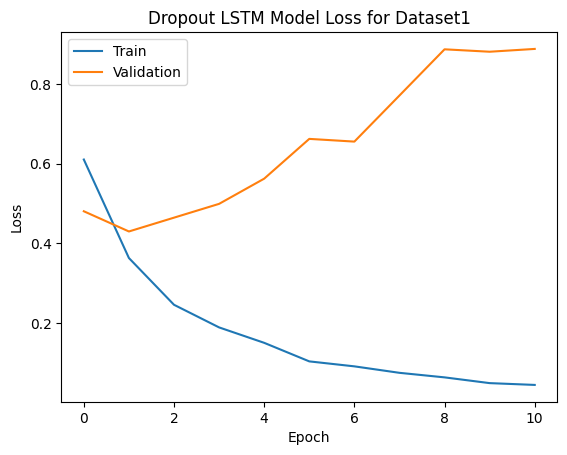

In [13]:
LSTM_Model(df1_texts, df1_labels, 'Dataset1')

Epoch 1/11
94/94 - 14s - 147ms/step - accuracy: 0.6605 - loss: 0.6037 - val_accuracy: 0.7335 - val_loss: 0.5649
Epoch 2/11
94/94 - 13s - 135ms/step - accuracy: 0.8377 - loss: 0.3820 - val_accuracy: 0.8540 - val_loss: 0.3536
Epoch 3/11
94/94 - 13s - 136ms/step - accuracy: 0.9085 - loss: 0.2440 - val_accuracy: 0.8485 - val_loss: 0.3641
Epoch 4/11
94/94 - 13s - 136ms/step - accuracy: 0.9368 - loss: 0.1732 - val_accuracy: 0.8465 - val_loss: 0.4038
Epoch 5/11
94/94 - 13s - 134ms/step - accuracy: 0.9530 - loss: 0.1423 - val_accuracy: 0.8325 - val_loss: 0.4934
Epoch 6/11
94/94 - 13s - 135ms/step - accuracy: 0.9698 - loss: 0.0952 - val_accuracy: 0.8490 - val_loss: 0.4824
Epoch 7/11
94/94 - 13s - 134ms/step - accuracy: 0.9735 - loss: 0.0837 - val_accuracy: 0.8320 - val_loss: 0.5357
Epoch 8/11
94/94 - 13s - 133ms/step - accuracy: 0.9743 - loss: 0.0717 - val_accuracy: 0.8370 - val_loss: 0.5860
Epoch 9/11
94/94 - 13s - 134ms/step - accuracy: 0.9783 - loss: 0.0697 - val_accuracy: 0.8215 - val_loss:

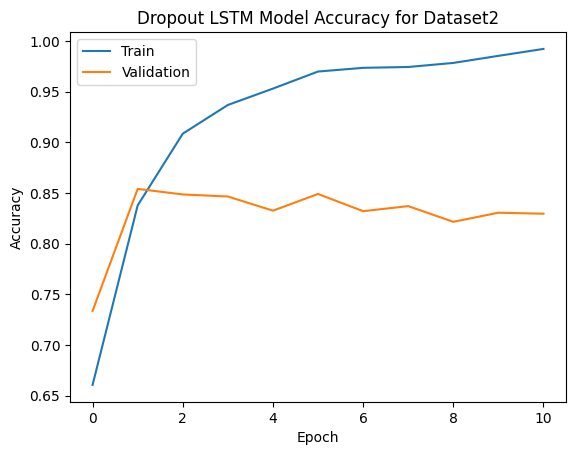

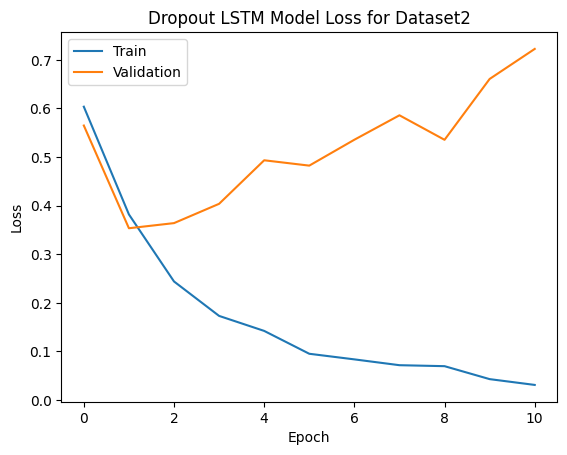

In [24]:
LSTM_Model(df2_texts, df2_labels, 'Dataset2')

Epoch 1/11
113/113 - 213s - 2s/step - accuracy: 0.6829 - loss: 0.5888 - val_accuracy: 0.7688 - val_loss: 0.4938
Epoch 2/11
113/113 - 212s - 2s/step - accuracy: 0.8281 - loss: 0.3888 - val_accuracy: 0.8221 - val_loss: 0.4096
Epoch 3/11
113/113 - 212s - 2s/step - accuracy: 0.8758 - loss: 0.3069 - val_accuracy: 0.8183 - val_loss: 0.4100
Epoch 4/11
113/113 - 219s - 2s/step - accuracy: 0.9057 - loss: 0.2474 - val_accuracy: 0.8067 - val_loss: 0.4476
Epoch 5/11
113/113 - 222s - 2s/step - accuracy: 0.9231 - loss: 0.2064 - val_accuracy: 0.7983 - val_loss: 0.4687
Epoch 6/11
113/113 - 235s - 2s/step - accuracy: 0.9351 - loss: 0.1837 - val_accuracy: 0.7971 - val_loss: 0.5454
Epoch 7/11
113/113 - 229s - 2s/step - accuracy: 0.9426 - loss: 0.1578 - val_accuracy: 0.8029 - val_loss: 0.5645
Epoch 8/11
113/113 - 223s - 2s/step - accuracy: 0.9569 - loss: 0.1286 - val_accuracy: 0.7804 - val_loss: 0.5551
Epoch 9/11
113/113 - 226s - 2s/step - accuracy: 0.9653 - loss: 0.1039 - val_accuracy: 0.7962 - val_loss:

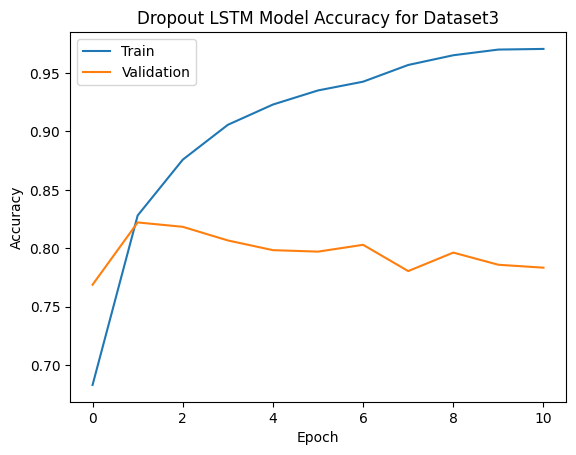

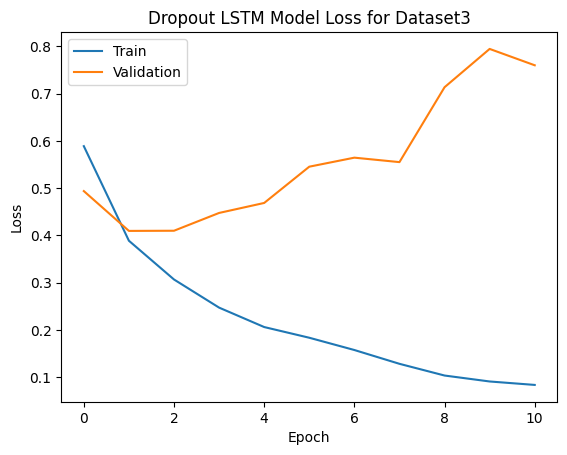

In [14]:
LSTM_Model(df3_texts, df3_labels, 'Dataset3')